# "Assignment 09 - Data analysis communication"
> "DH 140 Assignment 09: Use one of the Jupyter notebooks from this quarter's other assignments and create blog"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

# Assignment 05: Web Scraping

### Use requests and BeautifulSoup to make a list of all the CORGIS datasets

In [1]:
# import requests library
import requests

# import BeautifulSoup
from bs4 import BeautifulSoup

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# use requests to issue HTTP request to the website
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [3]:
# save all the html in a string variable
html_string = response.text

# use BeautifulSoup to create a new object to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

# use the "find" method of the "document" variable to look for the tag "h3" and make a list
h3_list = []
for i in document.find_all('h3'):
    h3_list.append(i.text)

#collapse-output

In [4]:
# inspect the CORGIS datasets list
h3_list

['Aids',
 'Airlines',
 'Billionaires',
 'Broadway',
 'Business Dynamics',
 'Cancer',
 'Cars',
 'Classics',
 'Construction Permits',
 'Construction Spending',
 'County Demographics',
 'Covid',
 'Drugs',
 'Earthquakes',
 'Election',
 'Electricity',
 'Emissions',
 'Energy',
 'Finance',
 'Food',
 'Food Access',
 'Global Development',
 'Graduates',
 'Health',
 'Hospitals',
 'Hydropower',
 'Ingredients',
 'Injuries',
 'Labor',
 'Medal Of Honor',
 'Music',
 'Opioids',
 'Police Shootings',
 'Publishers',
 'Real Estate',
 'Retail Services',
 'School Scores',
 'Skyscrapers',
 'Slavery',
 'State Crime',
 'State Demographics',
 'State Fragility',
 'Suicide Attacks',
 'Supreme Court',
 'Tate',
 'Video Games',
 'Weather',
 'Wind Turbines']

### Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe

In [5]:
# define pdfcorgis(), which takes a CORGIS dataset and returns a Pandas dataframe
def pdfcorgis(a):
    # convert a to lowercase
    x = a.lower()
    # get the website's HTML
    response = requests.get('https://corgis-edu.github.io/corgis/csv/' + x + '/')
    html_string = response.text
    # use BeautifulSoup to create a new object to search for HTML tags
    document = BeautifulSoup(html_string, "html.parser")
    # use for loop to loop over all the HTML elements that have the tag "a" (links)
    for i in document.find_all("a"):
        # if i has the attribute "download"
        if i.has_attr('download'):
            # extract link
            link = 'https://corgis-edu.github.io/corgis/datasets/csv/' + x + '/' + i.text.strip()
    corgisdf = pd.read_csv(link)
    return corgisdf

#collapse-hide

In [6]:
# test pdfcorgis() with "Classics"
pdfcorgis("Classics")

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,en,NaN,The Reluctant Heroes,Text,0,51483,1002,https://www.gutenberg.org/ebooks/51483,1926,...,0.076203,0.451757,4.68,11.0,0.09,32354,112,618,8824.5,6913
1002,NaN,en,NaN,"Film Truth; September, 1920",Text,0,51484,1003,https://www.gutenberg.org/ebooks/51484,0,...,0.143879,0.485782,5.02,17.0,0.06,45970,312,536,13080.6,9153
1003,NaN,en,NaN,Othmar,Text,0,51487,1004,https://www.gutenberg.org/ebooks/51487,1839,...,0.099478,0.548289,4.66,21.0,0.05,890918,4808,8921,258091.2,191182
1004,NaN,en,NaN,Church History (Volumes 1-3),Text,0,51491,1005,https://www.gutenberg.org/ebooks/51491,1809,...,0.112242,0.440014,5.31,17.0,0.06,3883244,46730,41950,1083170.7,730715


### Using dataframes returned by your new function, make a line plot, a bar plot, and a histogram plot

##### Line plot

In [7]:
# create Finance dataframe
finance_df = pdfcorgis("Finance")

#collapse-show

In [8]:
finance_df.head()

,State,Year,Totals.Capital outlay,Totals.Revenue,Totals.Expenditure,Totals.General expenditure,Totals.General revenue,Totals.Insurance trust revenue,Totals.Intergovernmental,Totals.License tax,...,Details.Welfare.Welfare Institution Total Expenditure,Details.Natural Resources.Parks.Parks Total Expenditure,Details.Transportation.Highways.Highways Total Expenditure,Totals. Debt at end of fiscal year,Details.Insurance benefits and repayments,Details.Interest on debt,Details.Interest on general debt,Details.Miscellaneous general revenue,Details.Other taxes,Details.Police protection
0,ALABAMA,1992,664748,10536166,9650515,8788293,8910315,1473217,2737180,395202,...,1853436,9728,694874,4128724,724852,280179,280179,607453,205227,77789
1,ALABAMA,1993,781952,11389335,10242374,9339796,9688246,1570768,2965310,377723,...,2016935,11031,856228,4170084,761582,267648,267648,599988,224878,78320
2,ALABAMA,1994,767100,11599362,10815221,9922352,10014415,1454982,3077084,386771,...,2167799,12053,883852,3853804,762811,250642,250642,643807,234592,86839
3,ALABAMA,1995,808001,12279726,11541881,10489513,10582838,1566923,3240417,480698,...,2291264,10645,924411,3758726,912649,193752,193752,643469,232783,83482
4,ALABAMA,1996,760751,12741148,12126587,10991713,10894396,1710360,3347019,422841,...,2325418,7788,881381,3645292,987710,216842,216842,649073,265426,86936


<AxesSubplot:title={'center':'Total Revenue (1992-2019)'}, xlabel='Year'>

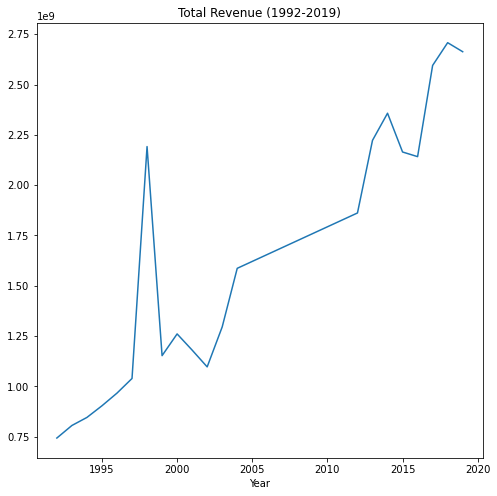

In [9]:
# line plot
finance_df.groupby('Year')['Totals.Revenue'].sum().plot(title='Total Revenue (1992-2019)', figsize=(8,8))

##### Bar plot

In [10]:
# create Airlines dataframe
airlines_df = pdfcorgis("Airlines")

#collapse-show

In [11]:
airlines_df.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


<AxesSubplot:title={'center':'Average Daily Number of Flights Per Airport'}, ylabel='Airport.Code'>

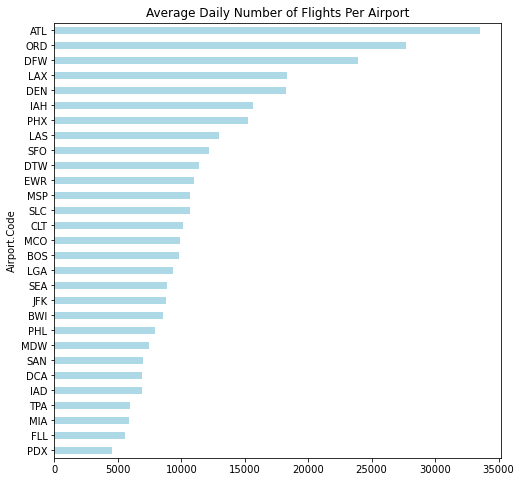

In [12]:
# bar plot
airlines_df.groupby('Airport.Code')['Statistics.Flights.Total'].mean().sort_values().plot.barh(figsize=(8,8), title='Average Daily Number of Flights Per Airport', color='lightblue')

##### Histrogram

In [13]:
# create Food dataframe
food_df = pdfcorgis("Food")

#collapse-show

In [14]:
food_df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


<AxesSubplot:title={'center':'Carbohydrate Contained in Food (in grams)'}, ylabel='Frequency'>

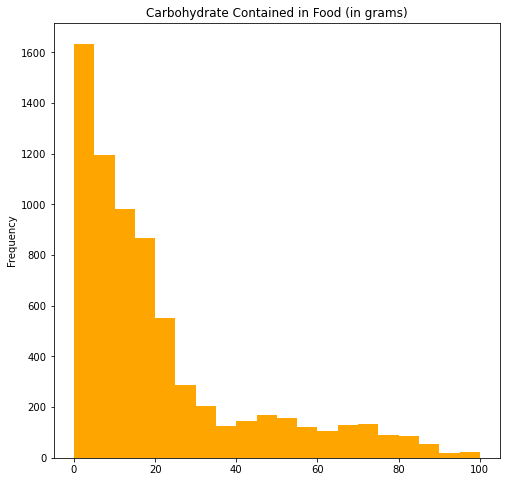

In [15]:
# histogram
food_df['Data.Carbohydrate'].plot.hist(bins=20, title='Carbohydrate Contained in Food (in grams)',
                                       figsize=(8,8), color='orange')